In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [35]:
np.random.seed(42)
random.seed(42)

In [36]:
def identify_low_variance_columns(dataframe, threshold):
    variance = dataframe.var()
    low_variance_cols = [col for col in dataframe.columns if variance[col] < threshold]

    return low_variance_cols

In [37]:
file_path = 'nasa.csv'
df = pd.read_csv(file_path)

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [38]:

date_columns = ['Close Approach Date', 'Orbit Determination Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

for col in date_columns:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_day_of_week'] = df[col].dt.dayofweek


df['Hazardous']=df['Hazardous'].astype('category')

X = df.drop(columns=['Hazardous'])
y = df['Hazardous']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

X_train = X_train.drop(columns=['Neo Reference ID','Name','Orbit ID'])

X_train = X_train.drop(columns=['Est Dia in M(min)',
                      'Est Dia in M(max)',
                      'Est Dia in Miles(min)',
                      'Est Dia in Miles(max)',
                      'Est Dia in Feet(min)',
                      'Est Dia in Feet(max)',
                      'Relative Velocity km per hr',
                      'Miles per hour',
                      'Miss Dist.(Astronomical)',
                      'Miss Dist.(lunar)',
                      'Miss Dist.(miles)',
                      'Orbiting Body',
                      'Equinox'])



In [39]:
exclude_cols = date_columns + [f'{col}_year' for col in date_columns] + [f'{col}_month' for col in date_columns] + [f'{col}_day' for col in date_columns] + [f'{col}_day_of_week' for col in date_columns]
nzv_columns = identify_low_variance_columns(X_train.drop(columns=exclude_cols), 0.01)
print(f"Near-zero variance columns: {nzv_columns}")


Near-zero variance columns: ['Minimum Orbit Intersection']


In [40]:
X_train = X_train.drop(columns=nzv_columns)
X_train.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Jupiter Tisserand Invariant,...,Mean Anomaly,Mean Motion,Close Approach Date_year,Close Approach Date_month,Close Approach Date_day,Close Approach Date_day_of_week,Orbit Determination Date_year,Orbit Determination Date_month,Orbit Determination Date_day,Orbit Determination Date_day_of_week
count,2812.000000,2812.000000,2812.000000,2812,2.812000e+03,2812.000000,2.812000e+03,2812,2812.000000,2812.000000,...,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,22.209975,0.211896,0.473813,2007-04-15 00:33:47.880512,1.176624e+12,14.057936,3.881987e+07,2017-04-15 10:24:35.200924672,3.452703,5.043958,...,181.905432,0.735890,2006.788051,6.526671,14.788407,3.003912,2016.976529,4.516358,7.890825,2.938834
min,11.160000,0.001839,0.004112,1995-01-01 00:00:00,7.889472e+11,0.335504,2.660989e+04,2014-06-13 15:20:44,0.000000,2.196000,...,0.003191,0.086285,1995.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,20.100000,0.034645,0.077469,2001-12-22 00:00:00,1.009008e+12,8.594311,2.030222e+07,2017-04-06 08:42:13.750000128,0.000000,4.002000,...,87.671576,0.439790,2001.000000,3.000000,8.000000,1.000000,2017.000000,4.000000,6.000000,3.000000
50%,21.800000,0.116026,0.259442,2007-11-22 00:00:00,1.195718e+12,12.937053,4.047822e+07,2017-04-06 09:03:15.500000,3.000000,5.043500,...,185.755469,0.708258,2007.000000,7.000000,15.000000,3.000000,2017.000000,4.000000,6.000000,3.000000
75%,24.425000,0.253837,0.567597,2012-12-08 00:00:00,1.354954e+12,18.127465,5.808932e+07,2017-04-06 09:22:36,6.000000,6.015000,...,277.011925,0.983792,2012.000000,10.000000,22.000000,5.000000,2017.000000,4.000000,6.000000,3.000000
max,30.800000,15.579552,34.836938,2016-09-08 00:00:00,1.473318e+12,43.789933,7.474496e+07,2017-09-28 06:49:30,9.000000,8.751000,...,359.917991,1.946801,2016.000000,12.000000,22.000000,6.000000,2017.000000,12.000000,31.000000,6.000000
std,2.897568,0.421039,0.941472,NaN,1.987035e+11,7.310493,2.187752e+07,NaN,3.068222,1.256539,...,107.684980,0.347974,6.303192,3.471949,5.737440,2.014441,0.181353,1.403893,5.410686,0.815075


In [41]:
print("No. of columns with missing variables = ", sum(summary.loc['count']<len(X_train)))
print("No. of duplicated instances = ", sum(X_train.duplicated()))

No. of columns with missing variables =  0
No. of duplicated instances =  0


In [42]:
scaler = StandardScaler()

exclude_cols = date_columns + [f'{col}_year' for col in date_columns] + [f'{col}_month' for col in date_columns] + [f'{col}_day' for col in date_columns] + [f'{col}_day_of_week' for col in date_columns]
columns_norm = [col for col in X_train.columns if col not in exclude_cols]

X_train[columns_norm] = scaler.fit_transform(X_train[columns_norm])

X_train.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Jupiter Tisserand Invariant,...,Mean Anomaly,Mean Motion,Close Approach Date_year,Close Approach Date_month,Close Approach Date_day,Close Approach Date_day_of_week,Orbit Determination Date_year,Orbit Determination Date_month,Orbit Determination Date_day,Orbit Determination Date_day_of_week
count,2.812000e+03,2.812000e+03,2.812000e+03,2812,2.812000e+03,2.812000e+03,2.812000e+03,2812,2.812000e+03,2.812000e+03,...,2.812000e+03,2.812000e+03,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,-5.938035e-17,7.580470e-18,-3.790235e-17,2007-04-15 00:33:47.880512,3.815503e-16,1.809837e-16,-4.042917e-17,2017-04-15 10:24:35.200924672,1.452923e-17,-4.927306e-17,...,5.559011e-17,-3.234334e-16,2006.788051,6.526671,14.788407,3.003912,2016.976529,4.516358,7.890825,2.938834
min,-3.814213e+00,-4.989895e-01,-4.989895e-01,1995-01-01 00:00:00,-1.951377e+00,-1.877421e+00,-1.773517e+00,2014-06-13 15:20:44,-1.125511e+00,-2.266913e+00,...,-1.689508e+00,-1.867151e+00,1995.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,-7.283180e-01,-4.210586e-01,-4.210586e-01,2001-12-22 00:00:00,-8.436974e-01,-7.475005e-01,-8.465746e-01,2017-04-06 08:42:13.750000128,-1.125511e+00,-8.293761e-01,...,-8.752439e-01,-8.510752e-01,2001.000000,3.000000,8.000000,1.000000,2017.000000,4.000000,6.000000,3.000000
50%,-1.415147e-01,-2.277384e-01,-2.277384e-01,2007-11-22 00:00:00,9.611280e-02,-1.533525e-01,7.581472e-02,2017-04-06 09:03:15.500000,-1.475719e-01,-3.648705e-04,...,3.575913e-02,-7.942019e-02,2007.000000,7.000000,15.000000,3.000000,2017.000000,4.000000,6.000000,3.000000
75%,7.645787e-01,9.963171e-02,9.963171e-02,2012-12-08 00:00:00,8.976261e-01,5.567685e-01,8.809444e-01,2017-04-06 09:22:36,8.303671e-01,7.729279e-01,...,8.833489e-01,7.125436e-01,2012.000000,10.000000,22.000000,5.000000,2017.000000,4.000000,6.000000,3.000000
max,2.965091e+00,3.650584e+01,3.650584e+01,2016-09-08 00:00:00,1.493415e+00,4.067754e+00,1.642393e+00,2017-09-28 06:49:30,1.808306e+00,2.950724e+00,...,1.653380e+00,3.480508e+00,2016.000000,12.000000,22.000000,6.000000,2017.000000,12.000000,31.000000,6.000000
std,1.000178e+00,1.000178e+00,1.000178e+00,NaN,1.000178e+00,1.000178e+00,1.000178e+00,NaN,1.000178e+00,1.000178e+00,...,1.000178e+00,1.000178e+00,6.303192,3.471949,5.737440,2.014441,0.181353,1.403893,5.410686,0.815075


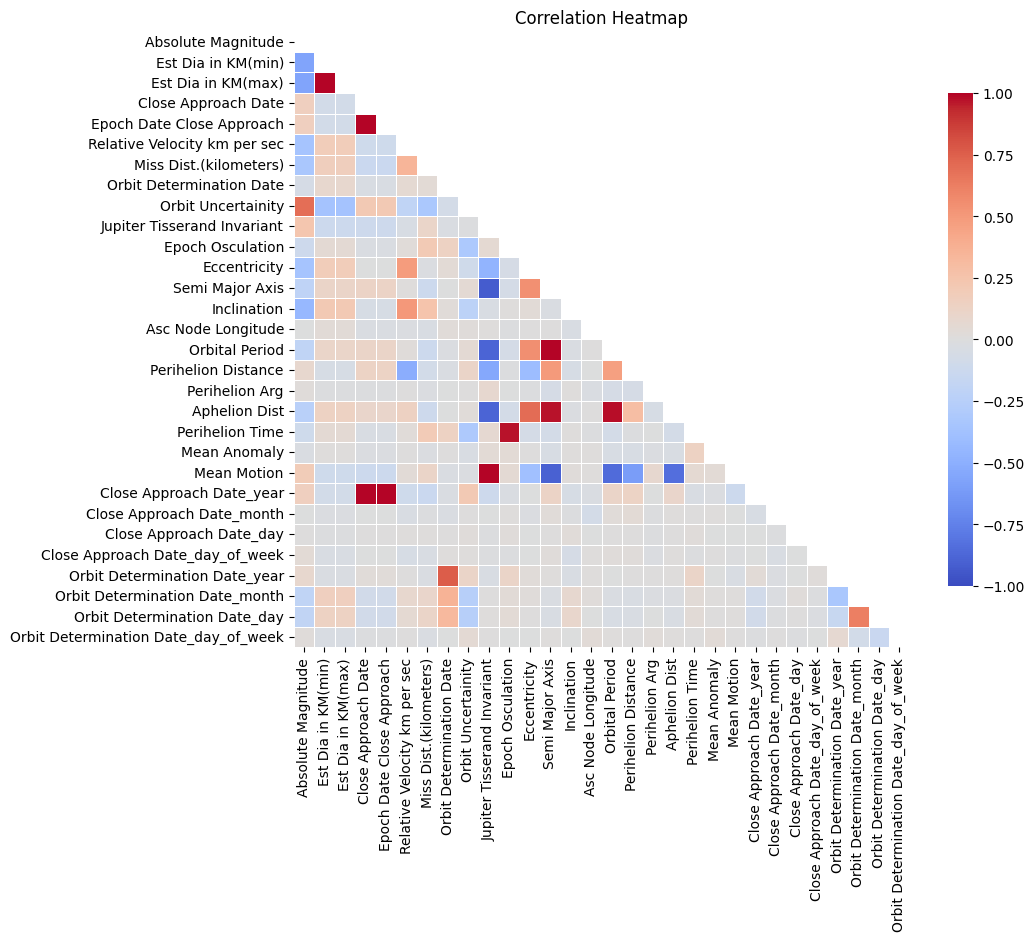

In [43]:
corr_matrix = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap')
plt.show()

In [44]:
X_train = X_train.drop(columns=date_columns)

X_train = X_train.drop(columns=['Close Approach Date_year',
                      'Jupiter Tisserand Invariant',
                      'Perihelion Time',
                      'Semi Major Axis',
                      'Orbital Period',
                      'Mean Motion'])

X_test = X_test.drop(columns=date_columns+nzv_columns)

X_test = X_test.drop(columns=['Neo Reference ID','Name','Orbit ID',
                      'Est Dia in M(min)',
                      'Est Dia in M(max)',
                      'Est Dia in Miles(min)',
                      'Est Dia in Miles(max)',
                      'Est Dia in Feet(min)',
                      'Est Dia in Feet(max)',
                      'Relative Velocity km per hr',
                      'Miles per hour',
                      'Miss Dist.(Astronomical)',
                      'Miss Dist.(lunar)',
                      'Miss Dist.(miles)',
                      'Orbiting Body',
                      'Equinox',
                      'Close Approach Date_year',
                      'Jupiter Tisserand Invariant',
                      'Perihelion Time',
                      'Semi Major Axis',
                      'Orbital Period',
                      'Mean Motion'])


In [45]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=40)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8469333333333333

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1590
         1.0       0.00      0.00      0.00       285

    accuracy                           0.85      1875
   macro avg       0.42      0.50      0.46      1875
weighted avg       0.72      0.85      0.78      1875



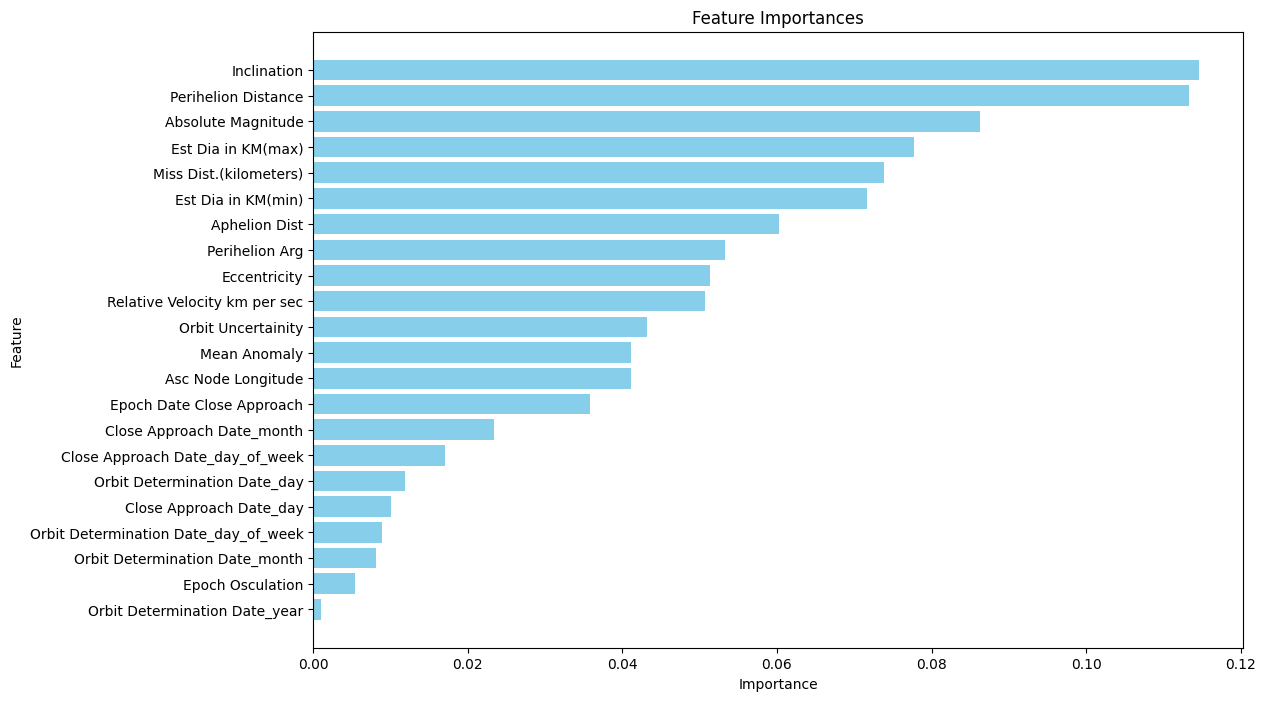

In [46]:
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()